In [23]:
from  sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt

In [24]:
iris= datasets.load_iris() # load iris data

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [27]:
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [28]:
X= iris.data[:,:2]  # only take 1st 2 feature
Y= iris.target
print(Y)
h= 0.2 # step size in mesh

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
# create mesh in plot
X_min, X_max = X[:,0].min() - 1, X[:,0].max() + 1  # X[:,0]selecting all rows and 0th column
Y_min, Y_max = X[:,1].min() - 1, X[:,1].max() + 1  # X[:,1]selecting all rows and 1st column
xx,yy = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

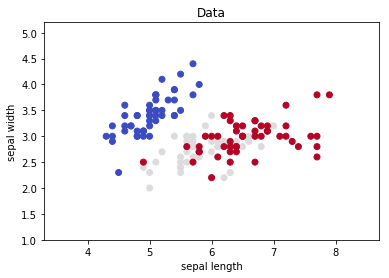

In [30]:
# plot also training plot
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.coolwarm)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.title('Data')
plt.show()

# Support Vector Machine

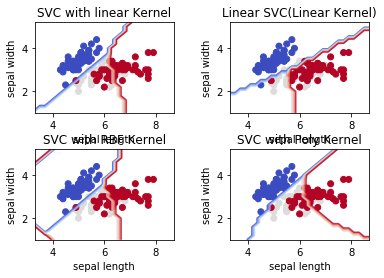

In [31]:
C= 0.1 # SVM regularization parameter
svc= svm.SVC(kernel= "linear",C=C).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)
poly_svc= svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)
lin_svc= svm.LinearSVC(C=C).fit(X,Y)

# plot the all svm
title=['SVC with linear Kernel',
      'Linear SVC(Linear Kernel)',
      'SVC with RBF Kernel',
      'SVC with Poly Kernel']
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4 , hspace=0.4)
    z= clf.predict(np.c_[xx.ravel(),yy.ravel()]) 
    # put result into color plot
    z= z.reshape(xx.shape)
    plt.contour(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
    #plot also the training points
    plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()
    plt.title(title[i])
    
plt.show()

### numpy.c_  Translates slice objects to concatenation along the second axis.

Example:

In [32]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [33]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])